In [2]:
pip install matplotlib

  Using cached matplotlib-3.3.3-cp39-cp39-win_amd64.whl (8.5 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp39-cp39-win_amd64.whl (51 kB)
  Using cached Pillow-8.1.0-cp39-cp39-win_amd64.whl (2.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
DATA_DIR = Path('../data/movielens/ml-latest')

In [6]:
!ls ../data/movielens/ml-latest/

genome-scores.csv
genome-tags.csv
links.csv
ml-latest-README.html
movies.csv
ratings.csv
README.txt
tags.csv


# Ratings

In [7]:
ratings = pd.read_csv(DATA_DIR / 'ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


In [9]:
ratings.timestamp = pd.to_datetime(ratings.timestamp)
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1970-01-01 00:00:01.256677221
1,1,481,3.5,1970-01-01 00:00:01.256677456
2,1,1091,1.5,1970-01-01 00:00:01.256677471
3,1,1257,4.5,1970-01-01 00:00:01.256677460
4,1,1449,4.5,1970-01-01 00:00:01.256677264


In [6]:
ratings.timestamp = pd.to_datetime(ratings.timestamp)
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1970-01-01 00:00:01.256677221
1,1,481,3.5,1970-01-01 00:00:01.256677456
2,1,1091,1.5,1970-01-01 00:00:01.256677471
3,1,1257,4.5,1970-01-01 00:00:01.256677460
4,1,1449,4.5,1970-01-01 00:00:01.256677264


In [7]:
ratings.timestamp.max(), ratings.timestamp.min()

(Timestamp('1970-01-01 00:00:01.537945149'),
 Timestamp('1970-01-01 00:00:00.789652004'))

In [8]:
ratings.describe()

,userId,movieId,rating
count,2.775344e+07,2.775344e+07,2.775344e+07
mean,1.419420e+05,1.848800e+04,3.530445e+00
std,8.170740e+04,3.510263e+04,1.066353e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,7.117600e+04,1.097000e+03,3.000000e+00
50%,1.420220e+05,2.716000e+03,3.500000e+00
75%,2.124590e+05,7.150000e+03,4.000000e+00
max,2.832280e+05,1.938860e+05,5.000000e+00


In [9]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [10]:
ratings.duplicated().sum()

0

In [11]:
ratings[['userId', 'movieId']].duplicated().sum()

0

<AxesSubplot:>

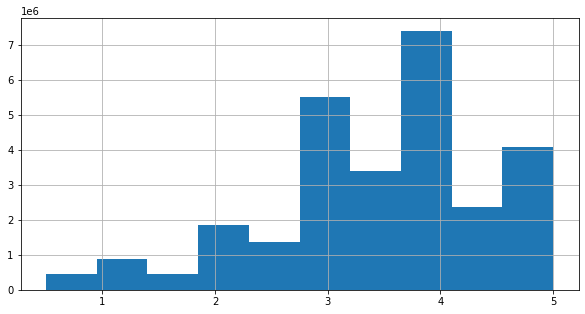

In [12]:
plt.figure(figsize=(10, 5))
ratings.rating.hist()

In [13]:
ratings.userId.value_counts()

123100    23715
117490     9279
134596     8381
212343     7884
242683     7515
          ...  
244681        1
69163         1
203079        1
184554        1
35319         1
Name: userId, Length: 283228, dtype: int64

In [14]:
ratings.userId.value_counts()[-30:]

207163    1
210322    1
248072    1
167512    1
261857    1
8359      1
147160    1
186747    1
98681     1
238163    1
139495    1
256299    1
94510     1
194973    1
165297    1
161208    1
62955     1
2417      1
95707     1
242038    1
184565    1
12551     1
152866    1
166177    1
233666    1
244681    1
69163     1
203079    1
184554    1
35319     1
Name: userId, dtype: int64

In [15]:
ratings.userId.value_counts()[:30]

123100    23715
117490     9279
134596     8381
212343     7884
242683     7515
111908     6645
77609      6398
63783      6346
172357     5868
141955     5810
158002     5701
253511     5356
48470      5257
183233     5169
94843      5130
73145      5042
37046      5041
187986     4951
4796       4874
236981     4854
133016     4785
191028     4707
221882     4575
263685     4572
7705       4546
252364     4508
60950      4470
105104     4426
239066     4351
66462      4292
Name: userId, dtype: int64

<AxesSubplot:>

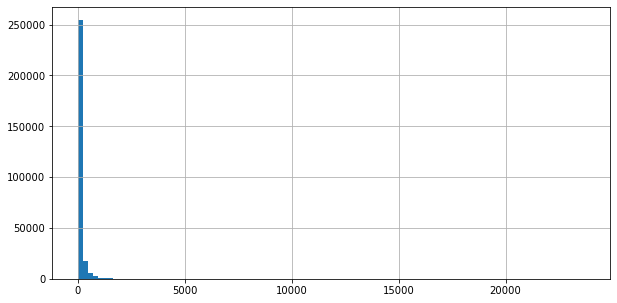

In [16]:
plt.figure(figsize=(10, 5))
ratings.userId.value_counts().hist(bins=100)

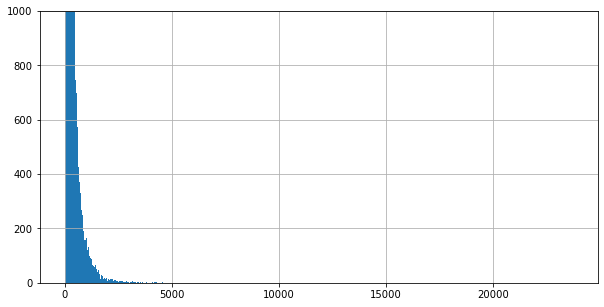

In [17]:
plt.figure(figsize=(10, 5))
ratings.userId.value_counts().hist(bins=1000)
plt.ylim(0, 1000);

(1000.0, 5000.0)

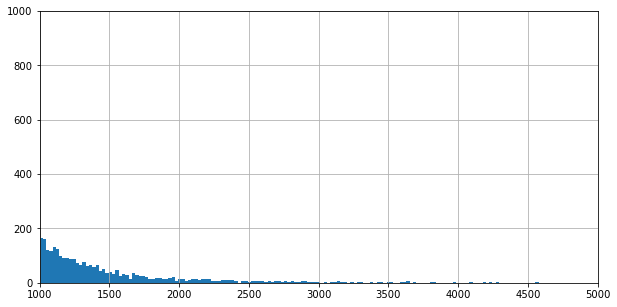

In [18]:
plt.figure(figsize=(10, 5))
ratings.userId.value_counts().hist(bins=1000)
plt.ylim(0, 1000); plt.xlim(1000, 5000)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa6659ca070>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa6659caa90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa6659eaf40>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa6659f30a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa6659f3400>],
 'means': []}

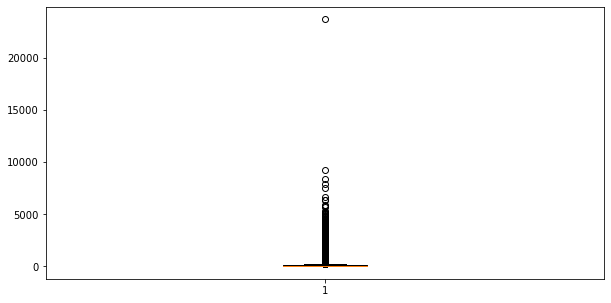

In [19]:
plt.figure(figsize=(10, 5))
x = ratings.userId.value_counts()
plt.boxplot(x)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa665a23b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa665a0e250>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa665a237f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa665a0e910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa665a0ec70>],
 'means': []}

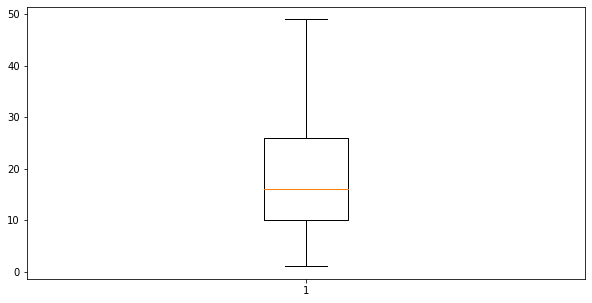

In [20]:
plt.figure(figsize=(10, 5))
x = ratings.userId.value_counts()
x = x[x < 50]
plt.boxplot(x)

# Movies

In [21]:
movies_raw = pd.read_csv(DATA_DIR / 'movies.csv')
movies_raw.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [22]:
movies = movies_raw.copy()

In [23]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [24]:
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [25]:
movies.describe(include=np.object)

,title,genres
count,58098,58098
unique,58020,1643
top,Shelter (2015),Drama
freq,2,8402


In [26]:
movies.genres.str.contains('Drama').sum() / len(movies)

0.41557368584116494

## Duplicates

In [27]:
movies.duplicated().sum()

0

### Title + genre

In [28]:
movies[movies.duplicated(subset=['title', 'genres'], keep='first')]

,movieId,title,genres
15902,80330,Offside (2006),Comedy|Drama
20835,101212,"Girl, The (2012)",Drama
25046,115777,Beneath (2013),Horror
27572,122940,Clear History (2013),Comedy
29852,128991,Johnny Express (2014),Animation|Comedy|Sci-Fi
30226,130062,Darling (2007),Drama
36172,143978,Home (2008),Drama
38804,150310,Macbeth (2015),Drama
44387,163246,Seven Years Bad Luck (1921),Comedy
48620,172427,Little Man (2006),Comedy


In [29]:
movies[movies.title == 'Offside (2006)']

,movieId,title,genres
11412,48682,Offside (2006),Comedy|Drama
15902,80330,Offside (2006),Comedy|Drama


In [30]:
len(ratings[ratings.movieId == 48682]), len(ratings[ratings.movieId == 80330])

(100, 10)

**Replace the movie ids**

In [31]:
title_movie_duplicates = movies[movies.duplicated(subset=['title', 'genres'], keep='first')][['title', 'genres']]
title_movie_duplicates

,title,genres
15902,Offside (2006),Comedy|Drama
20835,"Girl, The (2012)",Drama
25046,Beneath (2013),Horror
27572,Clear History (2013),Comedy
29852,Johnny Express (2014),Animation|Comedy|Sci-Fi
30226,Darling (2007),Drama
36172,Home (2008),Drama
38804,Macbeth (2015),Drama
44387,Seven Years Bad Luck (1921),Comedy
48620,Little Man (2006),Comedy


In [32]:
# Replaace movie_id in movies dataframe
# Do the same in raatings daataframe

### Title

In [33]:
movies[['title']].duplicated().sum()

78

In [34]:
movies[movies[['title']].duplicated()]

,movieId,title,genres
9142,26958,Emma (1996),Romance
9157,26982,Men with Guns (1997),Drama
13309,64997,War of the Worlds (2005),Action|Sci-Fi
13395,65665,Hamlet (2000),Drama
13614,67459,Chaos (2005),Crime|Drama|Horror
...,...,...,...
57269,191775,Berlin Calling (2008),Comedy|Drama
57305,191867,Let There Be Light (2017),Documentary
57361,192003,Journey to the Center of the Earth (2008),Action|Adventure|Fantasy|Sci-Fi
57463,192243,Contact (1992),Drama|Horror|Mystery|Thriller


In [35]:
title_duplicates = movies[movies.duplicated(subset=['title'], keep='first')]
title_duplicates.head()

,movieId,title,genres
9142,26958,Emma (1996),Romance
9157,26982,Men with Guns (1997),Drama
13309,64997,War of the Worlds (2005),Action|Sci-Fi
13395,65665,Hamlet (2000),Drama
13614,67459,Chaos (2005),Crime|Drama|Horror


In [36]:
for movie_title in title_duplicates.title.values:
    display(movies[movies.title == movie_title])

,movieId,title,genres
823,838,Emma (1996),Comedy|Drama|Romance
9142,26958,Emma (1996),Romance


,movieId,title,genres
1716,1788,Men with Guns (1997),Action|Drama
9157,26982,Men with Guns (1997),Drama


,movieId,title,genres
10241,34048,War of the Worlds (2005),Action|Adventure|Sci-Fi|Thriller
13309,64997,War of the Worlds (2005),Action|Sci-Fi


,movieId,title,genres
3508,3598,Hamlet (2000),Crime|Drama|Romance|Thriller
13395,65665,Hamlet (2000),Drama


,movieId,title,genres
11228,47254,Chaos (2005),Action|Crime|Drama|Thriller
13614,67459,Chaos (2005),Crime|Drama|Horror


,movieId,title,genres
11412,48682,Offside (2006),Comedy|Drama
15902,80330,Offside (2006),Comedy|Drama


,movieId,title,genres
13458,66140,Blackout (2007),Horror|Thriller
16920,85070,Blackout (2007),Drama


,movieId,title,genres
19914,97773,"Girl, The (2012)",Drama
20835,101212,"Girl, The (2012)",Drama


,movieId,title,genres
20141,98485,Aftermath (2012),Drama|Thriller
24599,114040,Aftermath (2012),Action|Thriller


,movieId,title,genres
21121,102190,"20,000 Leagues Under the Sea (1997)",Adventure|Romance|Sci-Fi
24626,114130,"20,000 Leagues Under the Sea (1997)",Romance|Sci-Fi


,movieId,title,genres
582,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
24657,114240,Aladdin (1992),Adventure|Animation|Children|Comedy|Fantasy


,movieId,title,genres
21655,104035,Beneath (2013),Horror
25046,115777,Beneath (2013),Horror


,movieId,title,genres
15033,75395,Frozen (2010),Drama|Horror|Thriller
26104,118818,Frozen (2010),Fantasy|Romance


,movieId,title,genres
24419,113459,Paradise (2013),Comedy|Drama
26972,121586,Paradise (2013),Romance


,movieId,title,genres
21691,104155,Clear History (2013),Comedy
27572,122940,Clear History (2013),Comedy


,movieId,title,genres
9831,32029,Hostage (2005),Action|Crime|Drama|Thriller
28370,124757,Hostage (2005),Crime|Drama|Thriller


,movieId,title,genres
10714,42015,Casanova (2005),Action|Adventure|Comedy|Drama|Romance
29790,128862,Casanova (2005),Comedy|Drama|Romance


,movieId,title,genres
23834,111519,Johnny Express (2014),Animation|Comedy|Sci-Fi
29852,128991,Johnny Express (2014),Animation|Comedy|Sci-Fi


,movieId,title,genres
18867,93279,Darling (2007),Drama
30226,130062,Darling (2007),Drama


,movieId,title,genres
25900,118117,Grace (2014),Horror|Thriller
33123,136820,Grace (2014),Drama


,movieId,title,genres
30344,130388,Black Field (2009),Drama|Romance
33882,138656,Black Field (2009),(no genres listed)


,movieId,title,genres
33963,138868,The Dream Team (2012),Comedy|Drama|Romance
33964,138870,The Dream Team (2012),Documentary


,movieId,title,genres
32008,134182,Holiday (2014),Action|Romance|Thriller
34830,140890,Holiday (2014),Drama


,movieId,title,genres
29253,127184,Eden (2014),Drama
36060,143703,Eden (2014),Drama|Thriller


,movieId,title,genres
15637,79254,Home (2008),Drama
36172,143978,Home (2008),Drama


,movieId,title,genres
5168,5264,Clockstoppers (2002),Action|Adventure|Sci-Fi|Thriller
36372,144426,Clockstoppers (2002),Adventure|Children|Sci-Fi|Thriller


,movieId,title,genres
25596,117304,Deranged (2012),Horror
36379,144440,Deranged (2012),Thriller


,movieId,title,genres
5905,6003,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Thriller
36458,144606,Confessions of a Dangerous Mind (2002),Comedy|Crime|Drama|Romance|Thriller


,movieId,title,genres
30842,131556,Inside (2012),(no genres listed)
36529,144748,Inside (2012),Horror


,movieId,title,genres
36566,144828,The Tunnel (1933),Sci-Fi
36567,144830,The Tunnel (1933),(no genres listed)


,movieId,title,genres
9956,32600,Eros (2004),Drama
37464,147002,Eros (2004),Drama|Romance


,movieId,title,genres
36467,144624,Truth (2015),Horror|Sci-Fi|Thriller
38063,148482,Truth (2015),Drama


,movieId,title,genres
33001,136564,Macbeth (2015),Drama
38804,150310,Macbeth (2015),Drama


,movieId,title,genres
26816,121223,The Reunion (2011),Action|Drama
38951,150732,The Reunion (2011),Comedy


,movieId,title,genres
33502,137717,Tag (2015),Drama
38968,150776,Tag (2015),Horror|Thriller


,movieId,title,genres
28292,124581,Slow Burn (2000),Action|Drama|Mystery|Thriller
39187,151375,Slow Burn (2000),Adventure|Thriller


,movieId,title,genres
33067,136696,Absolution (2015),Action|Adventure|Crime|Thriller
39377,151797,Absolution (2015),Drama|Thriller


,movieId,title,genres
38188,148814,Stranded (2015),Drama
40801,154943,Stranded (2015),Comedy


,movieId,title,genres
34711,140633,Another World (2014),Documentary
41491,156686,Another World (2014),(no genres listed)


,movieId,title,genres
30100,129749,The Connection (2014),Action|Crime|Thriller
42407,158763,The Connection (2014),Documentary


,movieId,title,genres
37427,146922,Shelter (2015),Drama
43076,160356,Shelter (2015),Drama|Sci-Fi|Thriller


,movieId,title,genres
37311,146624,Escalation (1968),Comedy
43300,160868,Escalation (1968),(no genres listed)


,movieId,title,genres
39891,152976,Forsaken (2016),Drama|Western
44369,163206,Forsaken (2016),Horror


,movieId,title,genres
14038,70155,Seven Years Bad Luck (1921),Comedy
44387,163246,Seven Years Bad Luck (1921),Comedy


,movieId,title,genres
41506,156718,Interrogation (2016),Drama|Thriller
44978,164568,Interrogation (2016),Action|Thriller


,movieId,title,genres
42705,159443,Office (2015),Drama
45022,164667,Office (2015),Thriller


,movieId,title,genres
3463,3553,Gossip (2000),Drama|Thriller
46590,168088,Gossip (2000),Comedy|Drama


,movieId,title,genres
2766,2851,Saturn 3 (1980),Adventure|Sci-Fi|Thriller
46716,168358,Saturn 3 (1980),Sci-Fi|Thriller


,movieId,title,genres
28415,124851,Delirium (2014),Adventure|Romance|Sci-Fi
46836,168634,Delirium (2014),Comedy


,movieId,title,genres
44865,164300,Free Fall (2014),Drama
46947,168866,Free Fall (2014),Action|Drama|Thriller


,movieId,title,genres
46100,167036,Sing (2016),Animation|Children|Comedy
47261,169530,Sing (2016),Drama


,movieId,title,genres
47016,169022,Classmates (2016),Animation
48196,171555,Classmates (2016),Comedy|Romance


,movieId,title,genres
11173,46865,Little Man (2006),Comedy
48620,172427,Little Man (2006),Comedy


,movieId,title,genres
44703,163955,The Promise (2016),Drama|Romance
49254,173729,The Promise (2016),Documentary


,movieId,title,genres
47331,169670,The Void (2016),Horror
49571,174449,The Void (2016),Fantasy|Horror|Sci-Fi|Thriller


,movieId,title,genres
25757,117668,Ecstasy (2011),Drama|Thriller
49668,174651,Ecstasy (2011),Comedy|Crime|Romance


,movieId,title,genres
13092,62467,Family Life (1971),Drama
50208,175857,Family Life (1971),(no genres listed)


,movieId,title,genres
38796,150294,The Forest (2016),Horror|Thriller
51340,178403,The Forest (2016),(no genres listed)


,movieId,title,genres
51562,178895,Veronica (2017),Drama|Mystery|Thriller
51773,179333,Veronica (2017),Horror


,movieId,title,genres
31427,132874,Rose (2011),Drama|War
52107,180029,Rose (2011),Action|Animation|Sci-Fi


,movieId,title,genres
2560,2644,Dracula (1931),Horror
52192,180205,Dracula (1931),Horror


,movieId,title,genres
51209,177993,Escape Room (2017),(no genres listed)
52303,180465,Escape Room (2017),Horror


,movieId,title,genres
51339,178401,Lucky (2017),Drama
52644,181329,Lucky (2017),Drama


,movieId,title,genres
18358,91199,Weekend (2011),Drama|Romance
52672,181385,Weekend (2011),Comedy|Drama|Romance


,movieId,title,genres
46904,168774,Detour (2017),Thriller
52795,181655,Detour (2017),Thriller


,movieId,title,genres
44097,162618,Apparition (2014),Horror|Thriller
52804,181675,Apparition (2014),(no genres listed)


,movieId,title,genres
6667,6776,Lagaan: Once Upon a Time in India (2001),Comedy|Drama|Musical|Romance
52842,181751,Lagaan: Once Upon a Time in India (2001),Adventure|Drama|Romance


,movieId,title,genres
42540,159059,The Midnight Man (2016),Crime|Thriller
53650,183459,The Midnight Man (2016),Horror


,movieId,title,genres
49692,174701,Ava (2017),Drama
54304,184893,Ava (2017),(no genres listed)


,movieId,title,genres
23768,111259,Good People (2014),Drama|Thriller
54775,185925,Good People (2014),Drama


,movieId,title,genres
42038,157955,The Break-In (2016),Drama|Thriller
56710,190241,The Break-In (2016),Horror


,movieId,title,genres
41768,157312,The Boss (2016),Comedy
56950,190881,The Boss (2016),Documentary


,movieId,title,genres
12985,61312,Noise (2007),Comedy|Drama
57238,191713,Noise (2007),Crime|Drama|Thriller


,movieId,title,genres
13504,66511,Berlin Calling (2008),Comedy|Drama
57269,191775,Berlin Calling (2008),Comedy|Drama


,movieId,title,genres
51989,179783,Let There Be Light (2017),(no genres listed)
57305,191867,Let There Be Light (2017),Documentary


,movieId,title,genres
12868,60514,Journey to the Center of the Earth (2008),Action|Adventure|Sci-Fi
57361,192003,Journey to the Center of the Earth (2008),Action|Adventure|Fantasy|Sci-Fi


,movieId,title,genres
54446,185191,Contact (1992),(no genres listed)
57463,192243,Contact (1992),Drama|Horror|Mystery|Thriller


,movieId,title,genres
56009,188541,Cargo (2017),Drama|Horror
57953,193559,Cargo (2017),Drama
